In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leitura dos dados coletados e formação do DataFrame

In [50]:
df_info_dados = pd.read_csv('../Projeto_Redes/assets/vava.csv', index_col=False)
df_info_dados.head()   


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.148,224.0.0.22,IGMPv3,62,Membership Report / Join group 224.0.0.252 for...
1,2,0.031477,2804:14c:da95:89ec:c481:477d:c00d:c902,2804:14c:da96:a1f9:7138:3114:ed05:3359,UDP,74,53962 > 61449 Len=12
2,3,0.032394,2804:14c:da96:a1f9:7138:3114:ed05:3359,2804:14c:da95:89ec:c481:477d:c00d:c902,UDP,74,61449 > 53962 Len=12
3,4,0.032533,2804:14c:da95:89ec:c481:477d:c00d:c902,2804:14c:da96:a1f9:7138:3114:ed05:3359,UDP,76,53962 > 61449 Len=14
4,5,0.046003,2804:14c:da96:a1f9:7138:3114:ed05:3359,2804:14c:da95:89ec:c481:477d:c00d:c902,UDP,76,61449 > 53962 Len=14


In [51]:
df_info_dados_minimized = df_info_dados[df_info_dados['Time'] <= 240]
# 659 até 779

In [52]:
df_info_dados_minimized.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.148,224.0.0.22,IGMPv3,62,Membership Report / Join group 224.0.0.252 for...
1,2,0.031477,2804:14c:da95:89ec:c481:477d:c00d:c902,2804:14c:da96:a1f9:7138:3114:ed05:3359,UDP,74,53962 > 61449 Len=12
2,3,0.032394,2804:14c:da96:a1f9:7138:3114:ed05:3359,2804:14c:da95:89ec:c481:477d:c00d:c902,UDP,74,61449 > 53962 Len=12
3,4,0.032533,2804:14c:da95:89ec:c481:477d:c00d:c902,2804:14c:da96:a1f9:7138:3114:ed05:3359,UDP,76,53962 > 61449 Len=14
4,5,0.046003,2804:14c:da96:a1f9:7138:3114:ed05:3359,2804:14c:da95:89ec:c481:477d:c00d:c902,UDP,76,61449 > 53962 Len=14


In [53]:
df_info_dados_minimized['Protocol'].value_counts()

Protocol
UDP        45629
TCP         1466
QUIC         262
ICMPv6       122
MDNS          60
TLSv1.2       56
DNS           48
R-GOOSE       11
TLSv1.3       10
IGMPv3         8
SSDP           8
ARP            6
IGMPv2         4
THRIFT         2
RTCP           2
IPv6           1
BROWSER        1
ICMP           1
Name: count, dtype: int64

In [54]:
df_info_dados_minimized.shape

(47697, 7)

In [55]:
df_info_dados_minimized.isnull().sum()

No.             0
Time            0
Source          0
Destination     0
Protocol        0
Length          0
Info           11
dtype: int64

In [56]:
client_length_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Source'] == '2804:14c:da96:a1f9:7138:3114:ed05:3359']['Length'])
client_time_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Source'] == '2804:14c:da96:a1f9:7138:3114:ed05:3359']['Time'])

In [57]:
server_to_client_length_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Destination'] == '2804:14c:da96:a1f9:7138:3114:ed05:3359']['Length'])
server_to_client_time_pkgs = list(df_info_dados_minimized[df_info_dados_minimized['Destination'] == '2804:14c:da96:a1f9:7138:3114:ed05:3359']['Time'])
'''192.168.0.103'''


'192.168.0.103'

In [58]:
len(client_length_pkgs)

941

Plot por tipos de Protocolos


In [59]:
def linear_space_transformer(space_x, space_y, slide_win):
  acc_time = 0
  acc_length = 0
  slide_pointer = slide_win
  new_linear_time_space = []
  new_linear_length_space = []
  
  counter = 0
  for i in range(len(space_x)):
    if space_x[i] > slide_pointer:
      new_linear_time_space.append(acc_time / counter)
      new_linear_length_space.append(acc_length / counter)
      slide_pointer = space_x[i] + slide_win
      acc_time = 0
      acc_length = 0
      counter = 0
    acc_time += space_x[i]
    acc_length += space_y[i]
    counter += 1
  
  new_linear_time_space.append(space_x[-1])
  new_linear_length_space.append(space_y[-1])
  
  return new_linear_time_space, new_linear_length_space

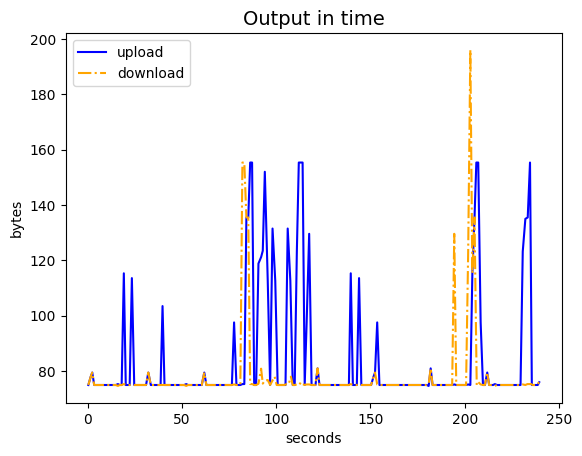

In [60]:
x_inicial, y_inicial = linear_space_transformer(client_time_pkgs, client_length_pkgs, 1)

plt.plot(x_inicial, y_inicial, color='b', label='upload')

x_final, y_final = linear_space_transformer(server_to_client_time_pkgs, server_to_client_length_pkgs, 1)

plt.plot(x_final, y_final, '-.', color = "orange", label="download")
plt.legend(loc="upper left")
plt.xlabel("seconds") 
plt.ylabel("bytes") 
plt.title('Output in time', fontdict={'fontsize': 14}) 
plt.show() 

In [61]:
def ecdf(data):
   
  """
  this function creates the x and y axis 
  for the Emperical Culmulative Distribution Function 
  """
  xaxis = np.sort(data)
  yaxis = np.arange(1, len(data) + 1) / len(data)
  
  return xaxis, yaxis

In [62]:
x_download, y_download = ecdf(df_info_dados_minimized[df_info_dados_minimized['Destination'] == '2804:14c:da96:a1f9:7138:3114:ed05:3359']['Length'])
x_upload, y_upload = ecdf(df_info_dados_minimized[df_info_dados_minimized['Source'] == '2804:14c:da96:a1f9:7138:3114:ed05:3359']['Length'])

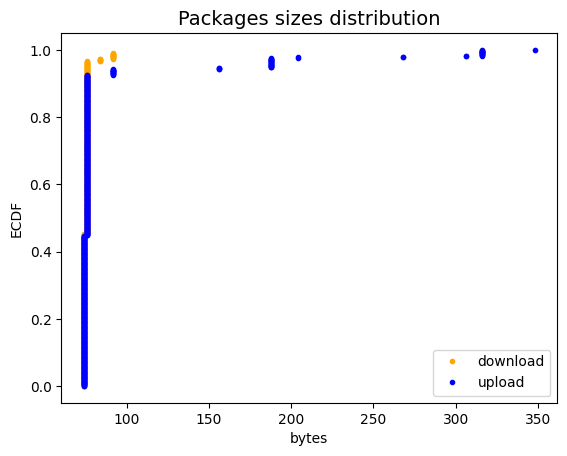

In [63]:
plt.plot(x_download, y_download, linestyle="none", marker=".", color = "orange", label="download")
plt.plot(x_upload, y_upload, linestyle="none", marker=".", color = "blue", label="upload")
plt.title("Packages sizes distribution",  fontdict={'fontsize': 14})
plt.xlabel("bytes")
plt.ylabel("ECDF")
plt.legend(loc="lower right")
plt.show()

<Axes: title={'center': 'UDP over time'}, xlabel='Time', ylabel='Length'>

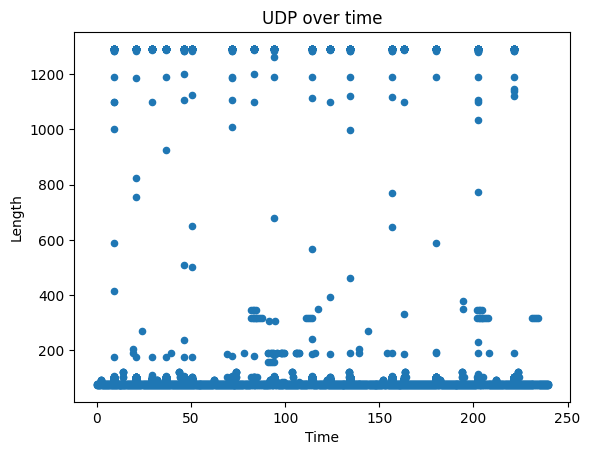

In [64]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'UDP'].plot(kind='scatter', x='Time', y='Length', title='UDP over time')

<Axes: title={'center': 'TCP over time'}, xlabel='Time', ylabel='Length'>

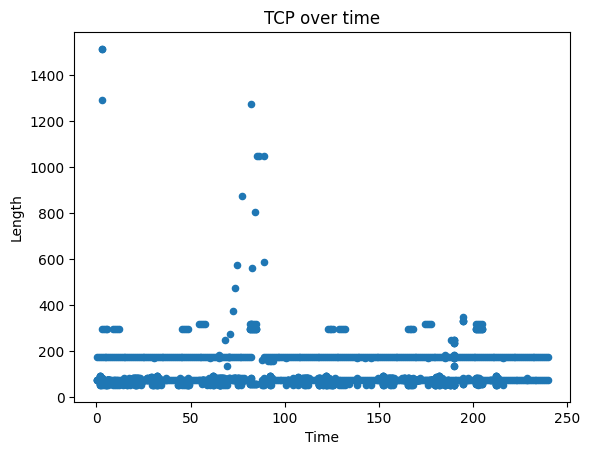

In [65]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'TCP'].plot(kind='scatter', x='Time', y='Length', title='TCP over time')

<Axes: title={'center': 'TLSv1.2 over time'}, xlabel='Time', ylabel='Length'>

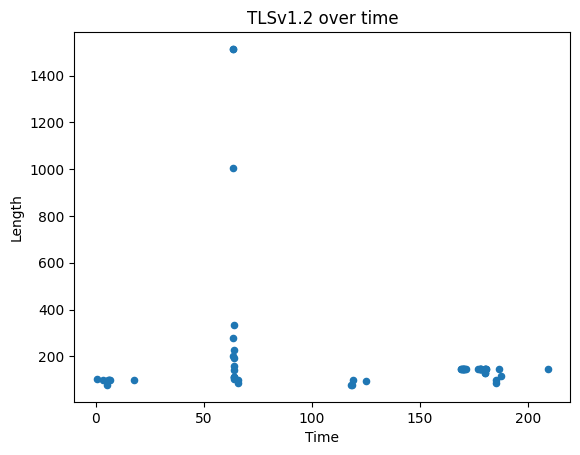

In [66]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'TLSv1.2'].plot(kind='scatter', x='Time', y='Length', title='TLSv1.2 over time')

<Axes: title={'center': 'TLSv1.3 over time'}, xlabel='Time', ylabel='Length'>

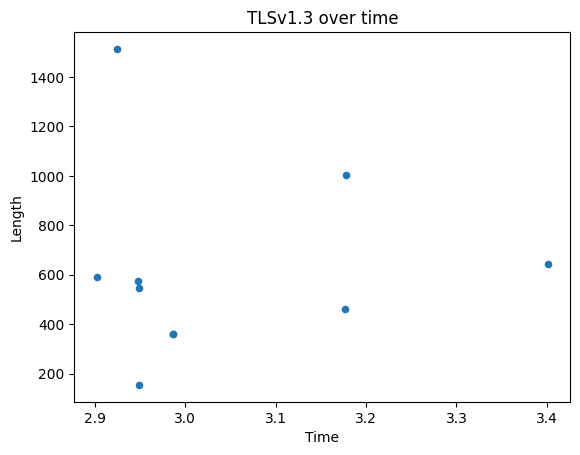

In [67]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'TLSv1.3'].plot(kind='scatter', x='Time', y='Length', title='TLSv1.3 over time')

<Axes: title={'center': 'IGMPv2 over time'}, xlabel='Time', ylabel='Length'>

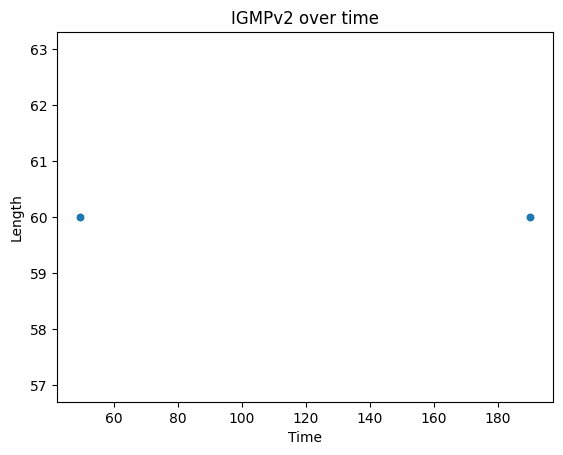

In [68]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'IGMPv2'].plot(kind='scatter', x='Time', y='Length', title='IGMPv2 over time')

<Axes: title={'center': 'IGMPv2 over time'}, xlabel='Time', ylabel='Length'>

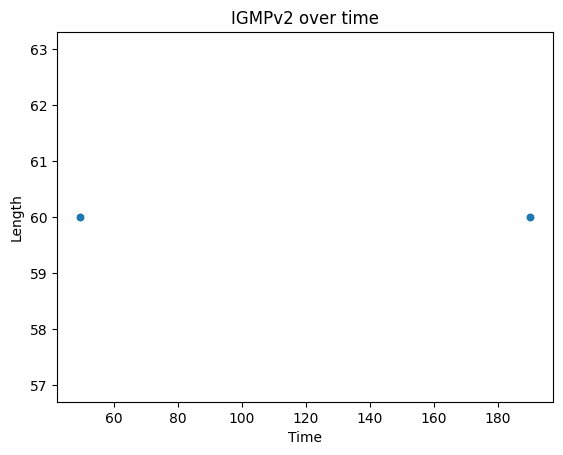

In [69]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'IGMPv2'].plot(kind='scatter', x='Time', y='Length', title='IGMPv2 over time')

<Axes: title={'center': 'DNS over time'}, xlabel='Time', ylabel='Length'>

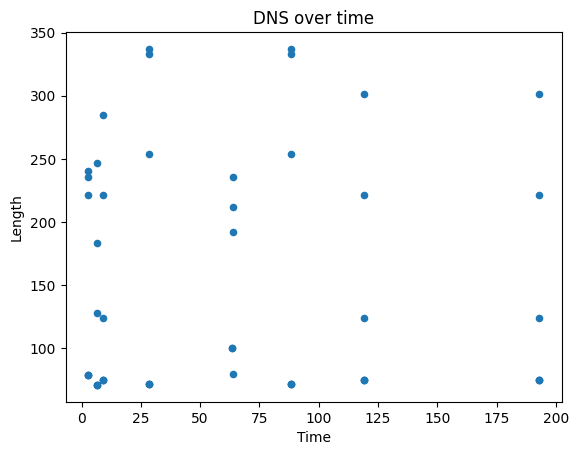

In [70]:
df_info_dados_minimized[df_info_dados_minimized['Protocol'] == 'DNS'].plot(kind='scatter', x='Time', y='Length', title='DNS over time')

<Axes: xlabel='Protocol', ylabel='Time'>

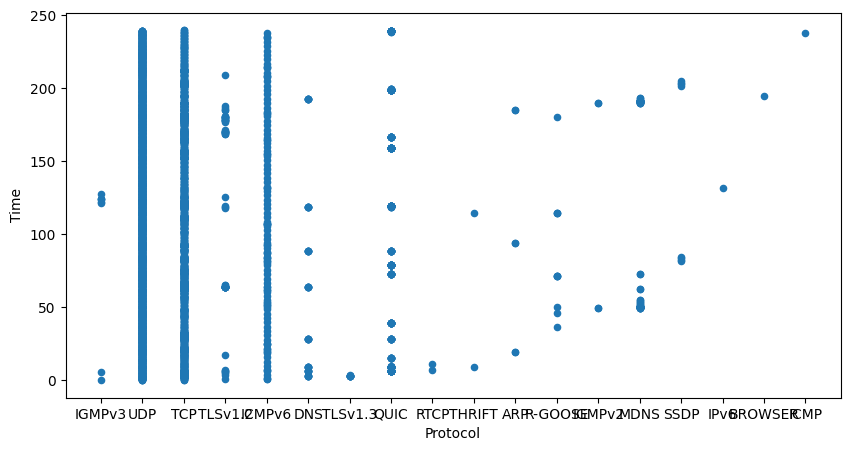

In [71]:
df_info_dados_minimized.plot.scatter(x='Protocol', y='Time', figsize=(10,5))

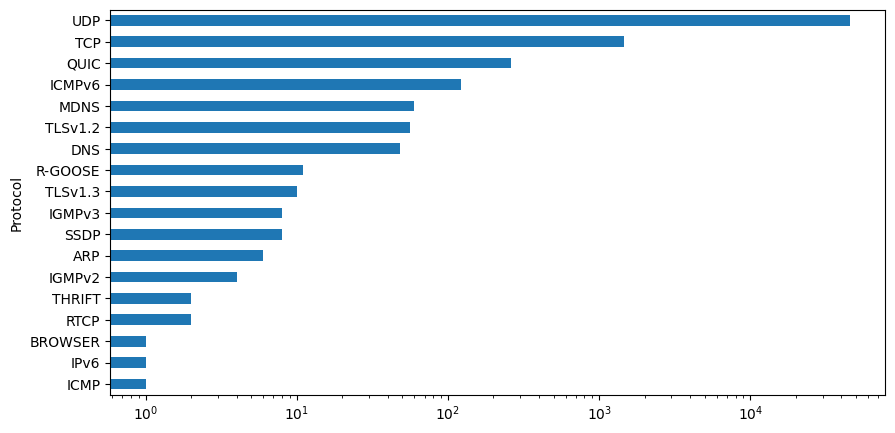

In [72]:
df_info_dados_minimized['Protocol'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))
plt.xscale('log')